# Neural networks outputs visualization
Here the outputs from the deep neural networks will be visualized.

In [2]:
## Libraries for visualization
import pandas as pd
import numpy as np
from os import path

from matplotlib import pyplot as plt
from matplotlib import rcParams

In [3]:
figures_path='../images'

In [4]:
test_o3df=pd.read_csv('../data/Monterrey/processed/Test_results_O3.csv')
test_pm25df=pd.read_csv('../data/Monterrey/processed/Test_results_PM25.csv')
test_pm10df=pd.read_csv('../data/Monterrey/processed/Test_results_PM10.csv')
train_o3df=pd.read_csv('../data/Monterrey/processed/Train_val_loss_acc_O3.csv')
train_pm25df=pd.read_csv('../data/Monterrey/processed/Train_val_loss_acc_PM25.csv')
train_pm10df=pd.read_csv('../data/Monterrey/processed/Train_val_loss_acc_PM10.csv')

polutant_names=['Ozone', 'PM2.5', 'PM10']
polu_labels=['$O_{3}$ (ppb)','$PM_{2.5}\ (\mu g/m^3)$','$PM_{10}\ (\mu g/m^3)$']
testmetrics=[test_o3df,test_pm25df,test_pm10df]
trainmetrics=[train_o3df,train_pm25df,train_pm10df]

In [5]:
trainmetrics[0].tail()

,epochs,t_rmse,t_loss,t_r2,val_rmse,val_loss,val_r2
495,495,1.370586,0.000991,0.854127,1.620847,0.001598,0.773264
496,496,1.378304,0.000998,0.856002,1.815344,0.001948,0.730994
497,497,1.485725,0.001184,0.826947,1.699805,0.001749,0.719734
498,498,1.515990,0.001223,0.814093,1.751998,0.001827,0.745837
499,499,1.395904,0.001039,0.849630,1.752468,0.001812,0.724921


In [6]:
testmetrics[0].tail()

,predicted,real
325,26.244822,22.000000
326,54.620520,51.348303
327,29.977816,33.000000
328,7.067514,5.000000
329,17.616865,19.000000


In [10]:
#To compute the metrics
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
r2_score(testmetrics[0]['real'],testmetrics[0]['predicted'])
np.sqrt(mean_squared_error(testmetrics[0]['real'],testmetrics[0]['predicted']))

5.813069532515044

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

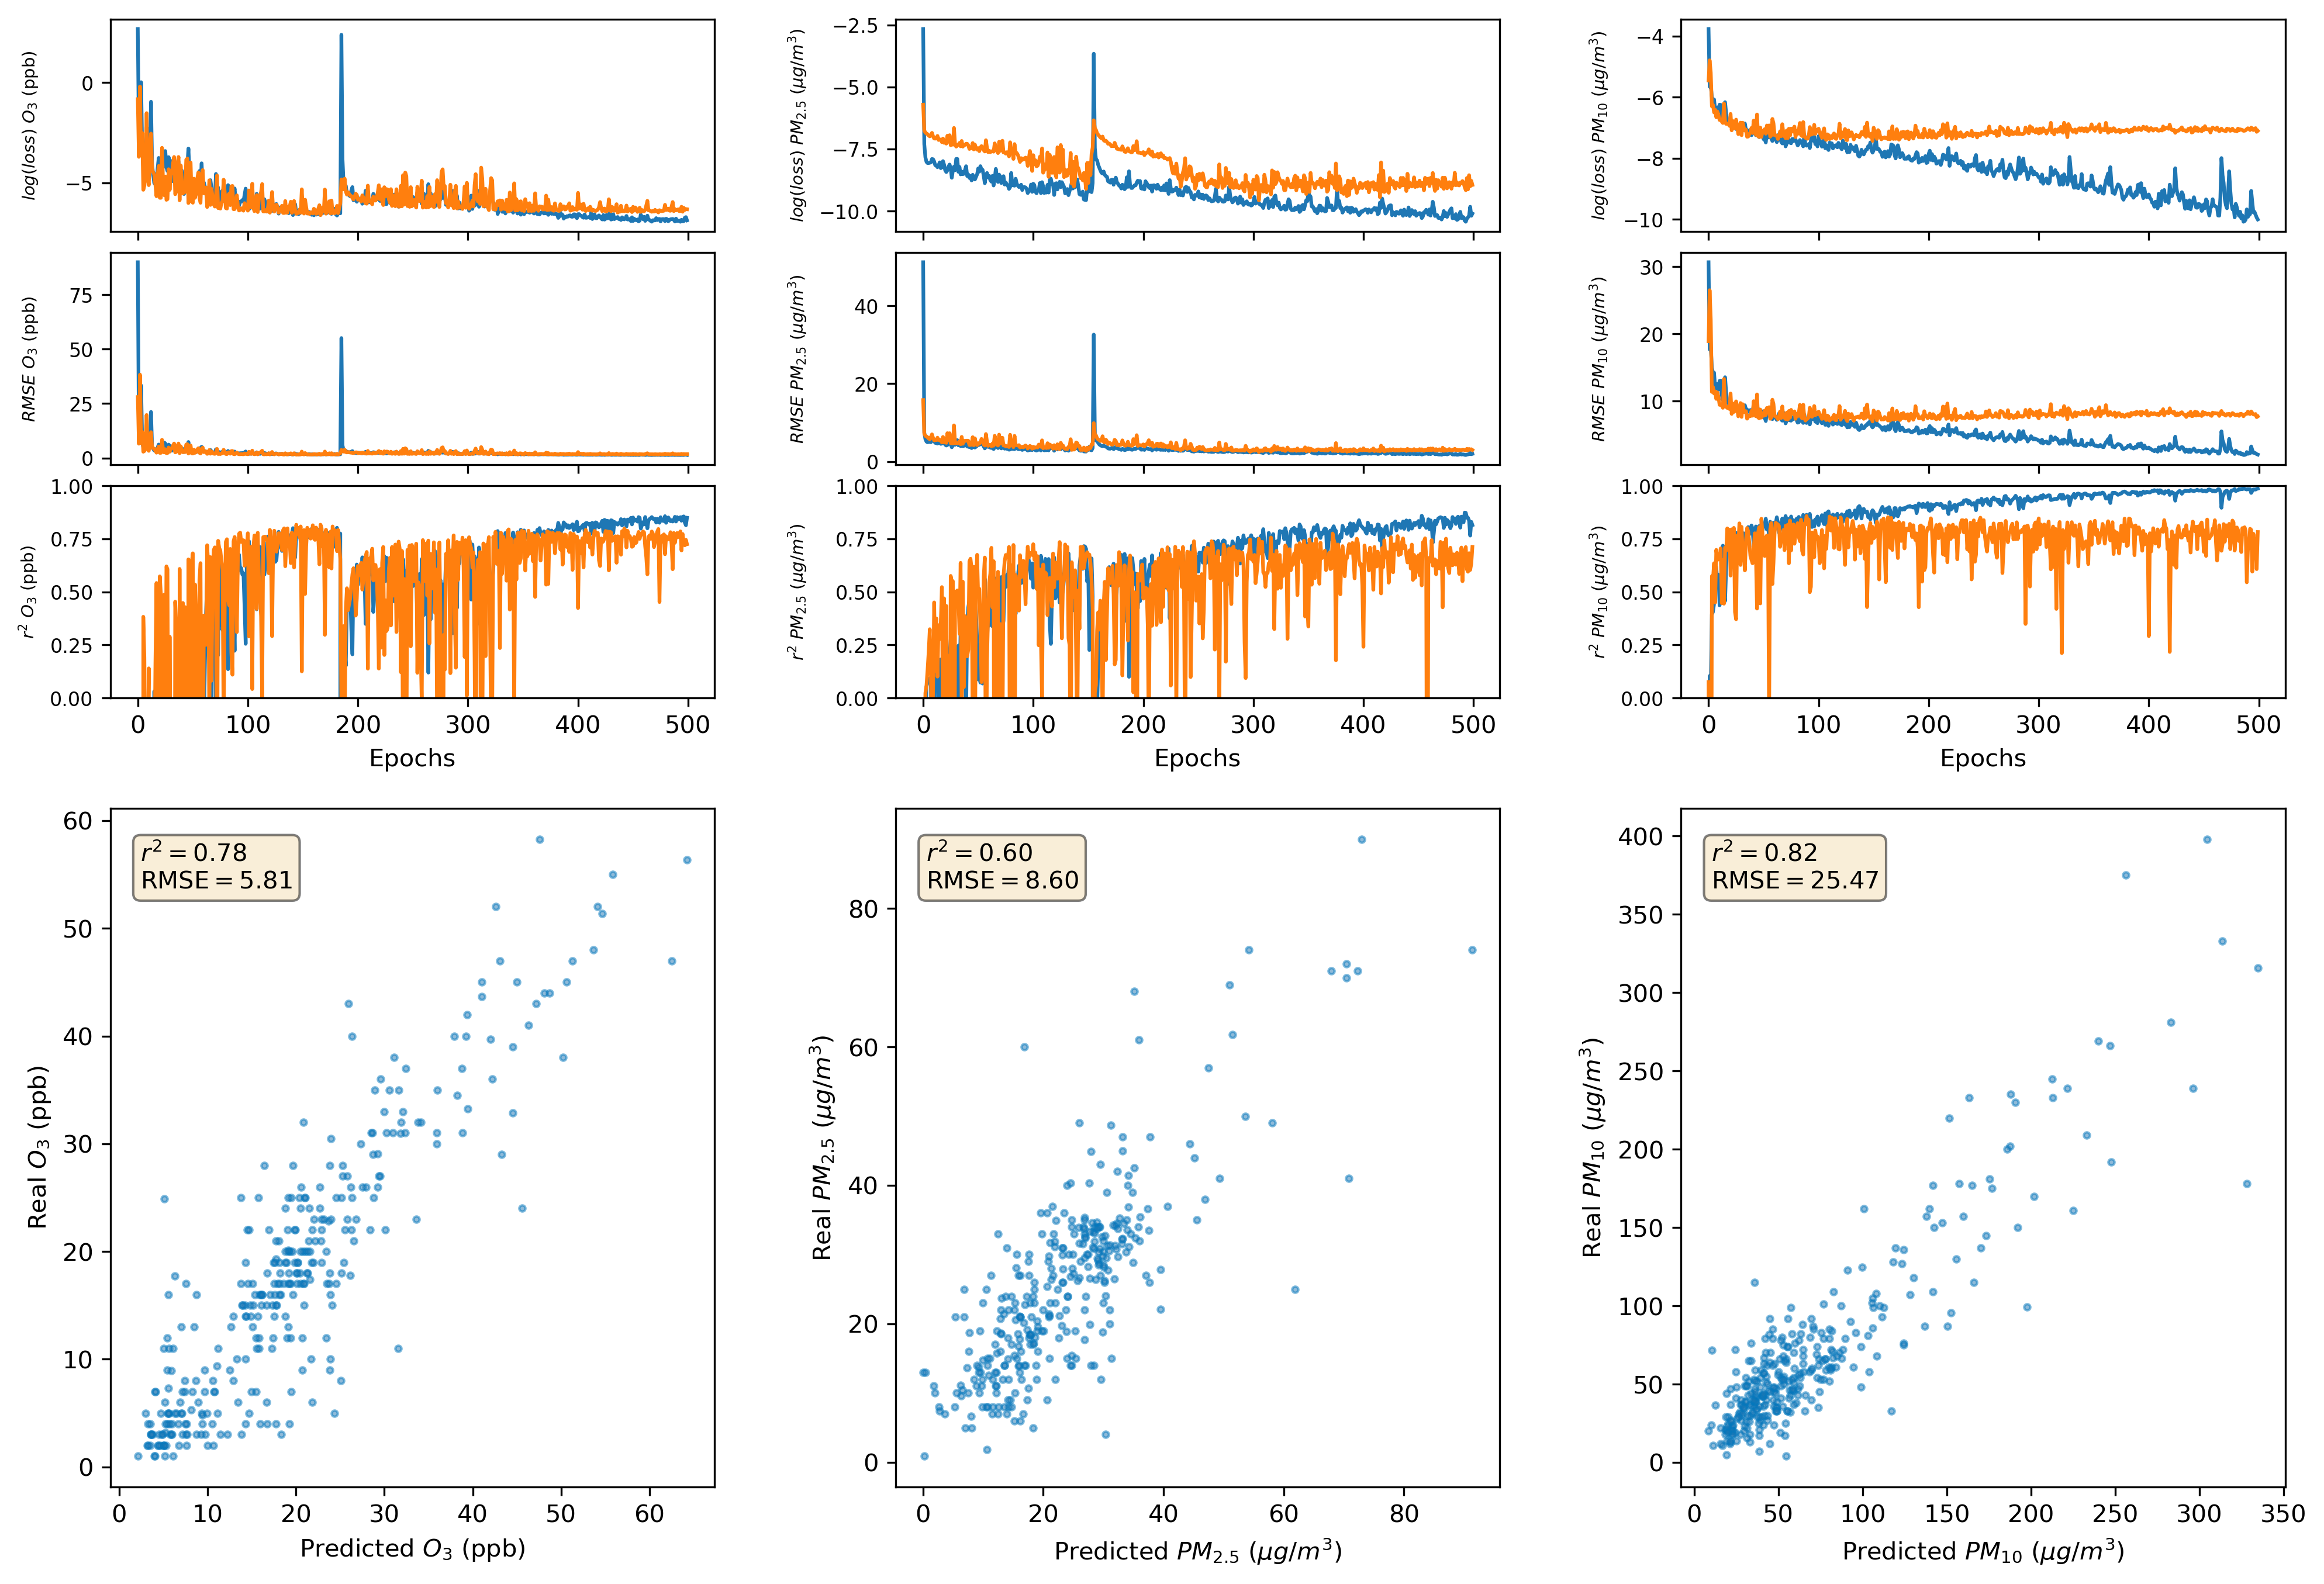

In [17]:
gridfig = plt.figure(figsize=(16,9), dpi=300)
traingrid = gridfig.add_gridspec(nrows=1, ncols=3, top=0.98, bottom=0.55, wspace=0.3)
testgrid = gridfig.add_gridspec(nrows=1, ncols=3, top= 0.48, bottom=0.05, hspace=0, wspace=0.3)

testsub=list()
trainsub=list()

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5) #Text box properties
for i,pol in enumerate(testmetrics):
    
    #Train metrics
    for j in range(3):
        inner_grid = gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=traingrid[i], hspace=0.1)
        trainsub.append(list())
        trainsub[i].append(gridfig.add_subplot(inner_grid[j]))
        if j!=2:
            trainsub[i][j].set_xticklabels([])
    
    #Loss
    trainsub[i][0].plot(trainmetrics[i]['epochs'],np.log(trainmetrics[i]['t_loss']))
    trainsub[i][0].plot(trainmetrics[i]['epochs'],np.log(trainmetrics[i]['val_loss']))
    trainsub[i][0].set_ylabel('$log(loss)$ '+polu_labels[i], **{'size':7})
    gridfig.align_ylabels(trainsub[i][:])

    #RMSE
    trainsub[i][1].plot(trainmetrics[i]['epochs'],trainmetrics[i]['t_rmse'])
    trainsub[i][1].plot(trainmetrics[i]['epochs'],trainmetrics[i]['val_rmse'])
    trainsub[i][1].set_ylabel('$RMSE$ '+polu_labels[i], **{'size':7})

    #r2
    trainsub[i][2].plot(trainmetrics[i]['epochs'],trainmetrics[i]['t_r2'])
    trainsub[i][2].plot(trainmetrics[i]['epochs'],trainmetrics[i]['val_r2'])
    trainsub[i][2].set_xlabel('Epochs')
    trainsub[i][2].set_ylabel('$r^2$ '+polu_labels[i], **{'size':7})
    trainsub[i][2].set_ylim([0,1])
    
    plt.draw()
    for j in range(3):
        #print(trainsub[i][j].get_yticklabels()[2])
        trainsub[i][j].set_yticklabels(trainsub[i][j].get_yticklabels(), **{'size':8})
    
    #Test plots
    testsub.append(gridfig.add_subplot(testgrid[i]))
    testsub[i].plot(pol['predicted'], pol['real'],**{'ls':'', 'marker':'.', 'ms':5, 'mec':'#0277BD', 'alpha':0.5})
    testsub[i].set_xlabel('Predicted '+ polu_labels[i])
    testsub[i].set_ylabel('Real '+ polu_labels[i])
    
    r2_test=r2_score(testmetrics[i]['real'],testmetrics[i]['predicted'])
    rmse_test=np.sqrt(mean_squared_error(testmetrics[i]['real'],testmetrics[i]['predicted']))
    
    textstr = '\n'.join((
    r'$ r^{2}=%.2f$' % (r2_test, ),
    r'$\mathrm{RMSE}=%.2f$' % (rmse_test, )))
    testsub[i].text(0.05, 0.95, textstr, transform=testsub[i].transAxes, fontsize=10,
        verticalalignment='top', bbox=props)
    
gridfig.savefig(path.join(figures_path,'DNN_results_metrics.jpg'))
gridfig.savefig(path.join(figures_path,'DNN_results_metrics.pdf'), format='pdf')